In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import os
from textwrap import wrap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import eli5
from cleanfunc import load_merge_clean
import re

sns.reset_orig()

C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [26]:
df = load_merge_clean()

C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\cartechr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [68]:
df.head()
df = df.drop('127011592', axis = 0)

In [69]:
cycle_col = 'METHOD OF TRAVEL TO WORK - EMPLOYED PERSONS Used one method - Bicycle no.'

In [70]:
y=df[cycle_col]
y = y/df['HOUSEHOLDS BY TYPE Total households no.']

In [71]:
y[y>1]

Series([], dtype: float64)

In [72]:
X = df.drop([cycle_col], axis = 1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [74]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
y_pred = rf.predict(X_test)

Text(0, 0.5, 'Actuals')

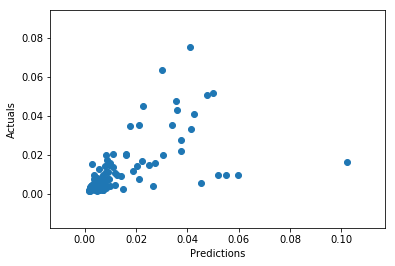

In [76]:

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')

In [77]:
perm = eli5.sklearn.PermutationImportance(rf).fit(X_test, y_test)

In [78]:
eli5.show_weights(perm)

In [ ]:
print(X.columns[148])
print(X.columns[174])
print(X.columns[141])


In [39]:
import geocoder
g = geocoder.osm('Badgerys Creek')



-33.9146793

In [40]:
print(g)
print(g.latlng[0])
print(g.latlng[1])

<[OK] Osm - Geocode [Badgerys Creek, Sydney, Liverpool, NSW, 2556, Australia]>
-33.9146793
150.7059123


In [9]:
addresses = X.index.levels[1].tolist()

In [10]:
lat = []
lng = []
for address in addresses:
    address = re.sub('Region', '', address)
    try:
        callstr = address
        print(callstr)
        g = geocoder.osm(callstr)
        assert g.country == 'Australia'
        lat.append(g.latlng[0])
        lng.append(g.latlng[1])
        print(g)
        continue
    except:
        pass
    
    try:
        callstr = address.split('-', 1)[0]+' Australia'
        print(callstr)
        g = geocoder.osm(callstr)
        assert g.country == 'Australia'
        lat.append(g.latlng[0])
        lng.append(g.latlng[1])
        print(g)
        continue
    except:
        pass
    
    try:
        callstr = address.split(' ', 1)[0]+' Australia'
        print(callstr)
        g = geocoder.osm(callstr)
        assert g.country == 'Australia'
        lat.append(g.latlng[0])
        lng.append(g.latlng[1])
        print(g)
        continue
    except:
        pass
    
    try:
        callstr = address.split('-', 1)[0]
        print(callstr)
        g = geocoder.osm(callstr)
        assert g.country == 'Australia'
        lat.append(g.latlng[0])
        lng.append(g.latlng[1])
        print(g)
        continue
    except:
        pass
    
    
    lat.append(None)
    lng.append(None)
    

Acacia Gardens
<[OK] Osm - Geocode [Acacia Gardens, Sydney, Blacktown, NSW, 2763, Australia]>
Adamstown - Kotara
<[OK] Osm - Geocode [Kotara Family Practice, Cynthia Street, Adamstown Heights, Newcastle-Maitland, Newcastle, NSW, 2289, Australia]>
Albion Park - Macquarie Pass
Albion Park  Australia
<[OK] Osm - Geocode [Albion Park, Shellharbour, NSW, 2527, Australia]>
Albion Park Rail
<[OK] Osm - Geocode [Albion Park Rail, Albion Park, Shellharbour, NSW, 2527, Australia]>
Albury - East
<[OK] Osm - Geocode [Albury, NSW, Australia]>
Albury - North
<[OK] Osm - Geocode [Albury, NSW, Australia]>
Albury - South
<[OK] Osm - Geocode [Albury, NSW, Australia]>
Albury 
<[OK] Osm - Geocode [Albury, NSW, Australia]>
Anna Bay
<[OK] Osm - Geocode [Anna Bay, Port Stephens, NSW, 2316, Australia]>
Armidale
<[OK] Osm - Geocode [Armidale, NSW, Australia]>
Armidale  - North
<[OK] Osm - Geocode [Armidale, NSW, Australia]>
Armidale  - South
<[OK] Osm - Geocode [Armidale, NSW, Australia]>
Arncliffe - Bardwell 

Braidwood Australia
<[OK] Osm - Geocode [Braidwood, Queanbeyan-Palerang, NSW, 2622, Australia]>
Branxton - Greta - Pokolbin
Branxton  Australia
<[OK] Osm - Geocode [Branxton, Cessnock, NSW, 2335, Australia]>
Broken Hill
<[OK] Osm - Geocode [Broken Hill, Broken Hill City Council, NSW, 2880, Australia]>
Broulee - Tomakin
Broulee  Australia
<[OK] Osm - Geocode [Broulee, Eurobodalla, NSW, Australia]>
Brunswick Heads - Ocean Shores
<[OK] Osm - Geocode [Brunswick Heads, Byron, NSW, 2483, Australia]>
Budgewoi - Buff Point - Halekulani
Budgewoi  Australia
<[OK] Osm - Geocode [Budgewoi, Central Coast, NSW, 2262, Australia]>
Bulahdelah - Stroud
<[OK] Osm - Geocode [Stroud Street, Bulahdelah, Mid-Coast, NSW, 2423, Australia]>
Burwood - Croydon
<[OK] Osm - Geocode [Croydon, Sydney, Burwood, NSW, 2132, Australia]>
Byron Bay
<[OK] Osm - Geocode [Byron Bay, Palm Valley, Byron, NSW, 2481, Australia]>
Cabramatta - Lansvale
<[OK] Osm - Geocode [Cabramatta Road East, Lansvale, Sydney, Fairfield, NSW, 216

<[OK] Osm - Geocode [Dorrigo, Bellingen, NSW, Australia]>
Double Bay - Bellevue Hill
Double Bay  Australia
<[OK] Osm - Geocode [Double Bay, Sydney, Woollahra, NSW, 2028, Australia]>
Douglas Park - Appin
Douglas Park  Australia
<[OK] Osm - Geocode [Douglas Park, Wollondilly, NSW, 2569, Australia]>
Dover Heights
<[OK] Osm - Geocode [Dover Heights, Sydney, Waverley, NSW, 2030, Australia]>
Drummoyne - Rodd Point
<[OK] Osm - Geocode [Rodd Point, The Bay Run, Rodd Point, Sydney, Canada Bay, NSW, 2046, Australia]>
Dubbo - East
<[OK] Osm - Geocode [Dubbo, Western Plains, NSW, Australia]>
Dubbo - South
<[OK] Osm - Geocode [Dubbo, Western Plains, NSW, Australia]>
Dubbo - West
<[OK] Osm - Geocode [Dubbo, Western Plains, NSW, Australia]>
Dubbo 
<[OK] Osm - Geocode [Dubbo, Western Plains, NSW, Australia]>
Dulwich Hill - Lewisham
<[OK] Osm - Geocode [Lewisham Street, Dulwich Hill, Sydney, Inner West, NSW, 2203, Australia]>
Dungog
<[OK] Osm - Geocode [Dungog, NSW, Australia]>
Dural - Kenthurst - Wise

<[OK] Osm - Geocode [Colo Vale, Wingecarribee, NSW, Australia]>
Hinchinbrook
<[OK] Osm - Geocode [Hinchinbrook, Sydney, Liverpool, NSW, 2168, Australia]>
Holsworthy - Wattle Grove
Holsworthy  Australia
<[OK] Osm - Geocode [Holsworthy, Sydney, Liverpool, NSW, 2173, Australia]>
Homebush
<[OK] Osm - Geocode [Homebush, Sydney, Strathfield, NSW, 2140, Australia]>
Homebush Bay - Silverwater
Homebush Bay  Australia
<[OK] Osm - Geocode [Homebush Bay, Homebush Bay Corso, Rhodes, Sydney, Canada Bay, NSW, 2138, Australia]>
Hornsby - East
<[OK] Osm - Geocode [Hornsby, NSW, Australia]>
Hornsby - West
<[OK] Osm - Geocode [Hornsby, NSW, Australia]>
Horsley - Kembla Grange
<[OK] Osm - Geocode [Kembla Grange Racecourse, West Dapto Road, Kembla Grange, Wollongong, NSW, 2526, Australia]>
Horsley Park - Kemps Creek
Horsley Park  Australia
<[OK] Osm - Geocode [Horsley Park, Sydney, Fairfield, NSW, 2175, Australia]>
Hoxton Park - Carnes Hill - Horningsea Park
Hoxton Park  Australia
<[OK] Osm - Geocode [Hoxt

<[OK] Osm - Geocode [Fairlight Manly Scout Hall, Raglan Street, Manly, Northern Beaches, Sydney, Northern Beaches, NSW, 2095, Australia]>
Manly Vale - Allambie Heights
Manly Vale  Australia
<[OK] Osm - Geocode [Manly Vale, Northern Beaches, Sydney, Northern Beaches, NSW, 2093, Australia]>
Maroubra - North
<[OK] Osm - Geocode [Maroubra, Bay Gardens, Sydney, Randwick, NSW, 2035, Australia]>
Maroubra - South
<[OK] Osm - Geocode [Maroubra, Bay Gardens, Sydney, Randwick, NSW, 2035, Australia]>
Maroubra - West
<[OK] Osm - Geocode [Maroubra, Bay Gardens, Sydney, Randwick, NSW, 2035, Australia]>
Marrickville
<[OK] Osm - Geocode [Marrickville, Sydney, Inner West, NSW, 2204, Australia]>
Maryland - Fletcher - Minmi
<[OK] Osm - Geocode [Minmi Road, Fletcher, Newcastle-Maitland, Newcastle, NSW, 2287, Australia]>
Mascot - Eastlakes
<[OK] Osm - Geocode [Mascot Drive, Eastlakes, Bay Gardens, Sydney, Bayside Council, NSW, 2018, Australia]>
Mayfield - Warabrook
<[OK] Osm - Geocode [Warabrook Boulevard, 

<[OK] Osm - Geocode [Parkes, NSW, Australia]>
Parklea - Kellyville Ridge
Parklea  Australia
<[OK] Osm - Geocode [Parklea, Sydney, Blacktown, NSW, 2768, Australia]>
Parramatta - Rosehill
<[OK] Osm - Geocode [Rosehill, Sydney, Parramatta, NSW, 2142, Australia]>
Peakhurst - Lugarno
<[OK] Osm - Geocode [Lugarno Soccer Club, Forest Road, Peakhurst, St George, Sydney, Georges River, NSW, 2210, Australia]>
Pendle Hill - Girraween
<[OK] Osm - Geocode [Girraween Public School, Gilba Road, Pendle Hill, Sydney, Cumberland, NSW, 2145, Australia]>
Pennant Hills - Cheltenham
Pennant Hills  Australia
<[OK] Osm - Geocode [Pennant Hills, Sydney, Hornsby, NSW, 2120, Australia]>
Penrith
Penrith Australia
<[OK] Osm - Geocode [Penrith, Sydney, Penrith, NSW, 2750, Australia]>
Petersham - Stanmore
<[OK] Osm - Geocode [Stanmore, Trafalgar Street, Stanmore, Sydney, Inner West, NSW, 2048, Australia]>
Picton - Tahmoor - Buxton
Picton  Australia
<[OK] Osm - Geocode [Picton, Bunbury, Western Australia, 6232, Austr

<[OK] Osm - Geocode [Boral Quarries Stockton, Fullerton Cove, Newcastle-Maitland, Port Stephens, NSW, 2318, Australia]>
Strathfield
<[OK] Osm - Geocode [Strathfield, NSW, Australia]>
Strathfield South
<[OK] Osm - Geocode [Strathfield South, Sydney, Strathfield, NSW, 2136, Australia]>
Summerland Point - Gwandalan
<[OK] Osm - Geocode [Gwandalan & Summerland Point Community Garden, Koowong Road, Gwandalan, Gosford, Central Coast, NSW, 2259, Australia]>
Surry Hills
<[OK] Osm - Geocode [Surry Hills, Sydney, NSW, 2010, Australia]>
Sussex Inlet - Berrara
<[OK] Osm - Geocode [Old Berrara Road, Mondayong, Wandandian, Shoalhaven, NSW, 2540, Australia]>
Sutherland - Kirrawee
<[OK] Osm - Geocode [Kirrawee, Sydney, Sutherland, NSW, 2232, Australia]>
Swansea - Caves Beach
<[OK] Osm - Geocode [Saint Patrick's Church - Swansea, Northcote Avenue, Caves Beach, Lake Macquarie, NSW, 2281, Australia]>
Sydenham - Tempe - St Peters
Sydenham  Australia
<[OK] Osm - Geocode [Sydenham, City of Brimbank, Victoria

<[OK] Osm - Geocode [Wickham, Newcastle-Maitland, Newcastle, NSW, 2293, Australia]>
Wiley Park
<[OK] Osm - Geocode [Wiley Park, Sydney, Canterbury-Bankstown, NSW, 2195, Australia]>
Williamtown - Medowie - Karuah
Williamtown  Australia
<[OK] Osm - Geocode [Williamtown, Port Stephens, NSW, 2318, Australia]>
Willoughby - Castle Cove - Northbridge
<[OK] Osm - Geocode [Northbridge, Lower North Shore, Sydney, Willoughby, NSW, 2063, Australia]>
Windang - Primbee
<[OK] Osm - Geocode [Windang Road, Primbee, Korongulla, Wollongong, NSW, 2502, Australia]>
Windsor - Bligh Park
<[OK] Osm - Geocode [Bligh Park, Sydney, Hawkesbury, NSW, 2756, Australia]>
Wingham
Wingham Australia
<[OK] Osm - Geocode [Wingham, Khatabundah, Mid-Coast, NSW, 2429, Australia]>
Winston Hills
<[OK] Osm - Geocode [Winston Hills, Sydney, Parramatta, NSW, 2153, Australia]>
Wollongong - East
<[OK] Osm - Geocode [Wollongong East, Crown Street Mall, Wollongong, NSW, 2500, Australia]>
Wollongong - West
<[OK] Osm - Geocode [Wollong

In [22]:
#because of multiple spelling of Woolaware/Wooloware we have a single error to fix
callstr = 'woolooware'
print(callstr)
g = geocoder.osm(callstr)
lat[550] = g.latlng[0]
lng[550] = g.latlng[1]


woolooware


None


In [49]:
latlng = pd.DataFrame({'lat':lat, 'long':lng}, index = X.index.levels[1].tolist())
latlng.index.name = 'LABEL'

In [50]:
latlng.to_csv('latlng.csv')

PermissionError: [Errno 13] Permission denied: 'latlng.csv'

In [51]:
latlng.head()

lat        long
LABEL                                              
Acacia Gardens               -33.732459  150.912532
Adamstown - Kotara           -32.943311  151.711626
Albion Park - Macquarie Pass -34.582362  150.775943
Albion Park Rail             -34.562578  150.797817
Albury - East                -36.014806  146.982171

In [44]:
df.head()

ESTIMATES OF PERSONAL INCOME Employee income earners no.  \
CODE      LABEL                                                                         
101021007 Braidwood                                                     1652.0          
101021008 Karabar                                                       4903.0          
101021009 Queanbeyan                                                    6320.0          
101021010 Queanbeyan - East                                             2946.0          
101021011 Queanbeyan Region                                             9342.0          

                             ESTIMATES OF PERSONAL INCOME Employee income earners - median age  years  \
CODE      LABEL                                                                                         
101021007 Braidwood                                                       44.0                          
101021008 Karabar                                                         40.0                          
101021009 Queanbeyan                                                      37.0                          
101021010 Queanbeyan - East                                               37.0                          
101021011 Queanbeyan Region                                               43.0                          

                             ESTIMATES OF PERSONAL INCOME Total Employee income $  \
CODE      LABEL                                                                     
101021007 Braidwood                                                 90828866.0      
101021008 Karabar                                                  296605105.0      
101021009 Queanbeyan                                               380343539.0      
101021010 Queanbeyan - East                                        183054351.0      
101021011 Queanbeyan Region                                        695038085.0      

                             ESTIMATES OF PERSONAL INCOME Median Employee income $  \
CODE      LABEL                                                                      
101021007 Braidwood                                                    45312.0       
101021008 Karabar                                                      56591.0       
101021009 Queanbeyan                                                   56111.0       
101021010 Queanbeyan - East                                            56314.0       
101021011 Queanbeyan Region                                            67856.0       

                             ESTIMATES OF PERSONAL INCOME Mean Employee income $  \
CODE      LABEL                                                                    
101021007 Braidwood                                                    54981.0     
101021008 Karabar                                                      60495.0     
101021009 Queanbeyan                                                   60181.0     
101021010 Queanbeyan - East                                            62137.0     
101021011 Queanbeyan Region                                            74399.0     

                             ESTIMATES OF PERSONAL INCOME Employee income as main source of income %  \
CODE      LABEL                                                                                        
101021007 Braidwood                                                       63.3                         
101021008 Karabar                                                         85.1                         
101021009 Queanbeyan                                                      84.7                         
101021010 Queanbeyan - East                                               82.1                         
101021011 Queanbeyan Region                                               75.7                         

                             ESTIMATES OF PERSONAL INCOME Own unincorporated business income earners no.  \
CODE      LABEL                             

In [52]:
newdf = pd.merge(df, latlng, how = 'left', left_on=['LABEL'], right_on = ['LABEL'])

In [53]:
newdf.head()

ESTIMATES OF PERSONAL INCOME Employee income earners no.  \
LABEL                                                                         
Braidwood                                                     1652.0          
Karabar                                                       4903.0          
Queanbeyan                                                    6320.0          
Queanbeyan - East                                             2946.0          
Queanbeyan Region                                             9342.0          

                   ESTIMATES OF PERSONAL INCOME Employee income earners - median age  years  \
LABEL                                                                                         
Braidwood                                                       44.0                          
Karabar                                                         40.0                          
Queanbeyan                                                      37.0                          
Queanbeyan - East                                               37.0                          
Queanbeyan Region                                               43.0                          

                   ESTIMATES OF PERSONAL INCOME Total Employee income $  \
LABEL                                                                     
Braidwood                                                 90828866.0      
Karabar                                                  296605105.0      
Queanbeyan                                               380343539.0      
Queanbeyan - East                                        183054351.0      
Queanbeyan Region                                        695038085.0      

                   ESTIMATES OF PERSONAL INCOME Median Employee income $  \
LABEL                                                                      
Braidwood                                                    45312.0       
Karabar                                                      56591.0       
Queanbeyan                                                   56111.0       
Queanbeyan - East                                            56314.0       
Queanbeyan Region                                            67856.0       

                   ESTIMATES OF PERSONAL INCOME Mean Employee income $  \
LABEL                                                                    
Braidwood                                                    54981.0     
Karabar                                                      60495.0     
Queanbeyan                                                   60181.0     
Queanbeyan - East                                            62137.0     
Queanbeyan Region                                            74399.0     

                   ESTIMATES OF PERSONAL INCOME Employee income as main source of income %  \
LABEL                                                                                        
Braidwood                                                       63.3                         
Karabar                                                         85.1                         
Queanbeyan                                                      84.7                         
Queanbeyan - East                                               82.1                         
Queanbeyan Region                                               75.7                         

                   ESTIMATES OF PERSONAL INCOME Own unincorporated business income earners no.  \
LABEL                                                                                            
Braidwood                                                      728.0                             
Karabar                                                        452.0                             
Queanbeyan                                                     622.0                             
Queanbeyan - East                                              310.0    

In [83]:
#newdf = newdf.drop('Badgerys Creek', axis = 0)
y=newdf[cycle_col]
y = y/newdf['HOUSEHOLDS BY TYPE Total households no.']
X = newdf.drop([cycle_col], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0, 0.5, 'Actuals')

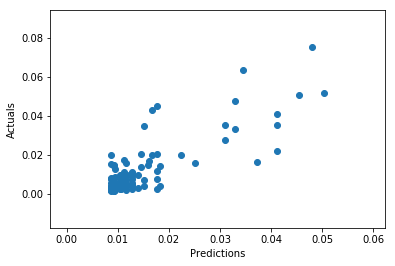

In [89]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

plt.scatter(y_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actuals')





In [95]:
#perm = eli5.sklearn.PermutationImportance(ada).fit(X_test, y_test)
eli5.show_weights(ada)

In [98]:
eli5.sklearn.explain_prediction.explain_prediction_tree_regressor(ada, X_test[1])

KeyError: 1

In [87]:
X.shape

(562, 219)

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.602857987191903